# Groupby操作

In [2]:
import pandas as pd
import numpy as np

在处理金融时间数据时，我们经常会遇到长格式数据：

In [26]:
df_wide = pd.DataFrame(np.random.randn(10, 10),
                  index=pd.date_range("2018-01-01", periods=10, name="trade_date"),
                  columns=pd.Index(["000001.SZ", "000002.SZ", "000003.SZ", "000004.SZ", "600000.SH", "600001.SH", "600002.SH", "600003.SH", "600004.SH", "600005.SH"], name="code"))
df_long = df_wide.stack(-1).reset_index()
df_long.rename({0: "return"},axis=1, inplace=True)
ser = df_long["code"].map({"000001.SZ": "finance", "000002.SZ": "finance", 
                           "000003.SZ": "finance", "000004.SZ": "finance", 
                           "600000.SH": "finance", "600001.SH": "IT",  
                           "600002.SH": "IT", "600003.SH": "IT", 
                           "600004.SH": "IT", "600005.SH": "IT"})
df_long.insert(1, "industry", ser)
df_long

,trade_date,industry,code,return
0,2018-01-01,finance,000001.SZ,0.134070
1,2018-01-01,finance,000002.SZ,-2.260022
2,2018-01-01,finance,000003.SZ,-1.319141
3,2018-01-01,finance,000004.SZ,1.248812
4,2018-01-01,finance,600000.SH,-1.458900
5,2018-01-01,IT,600001.SH,-1.861417
6,2018-01-01,IT,600002.SH,0.480251
7,2018-01-01,IT,600003.SH,0.973385
8,2018-01-01,IT,600004.SH,0.885600
9,2018-01-01,IT,600005.SH,1.262396


如果需要对这种类型的数据进行分组统计，就需要用到groupby

例如，计算每天，每个行业的平均收益率

In [22]:
df_long.groupby(["trade_date", "industry"]).mean()

return
trade_date industry          
2018-01-01 IT       -0.543912
           finance   0.443580
2018-01-02 IT       -0.049297
           finance  -0.525071
2018-01-03 IT       -0.307338
           finance  -0.465747
2018-01-04 IT       -0.853079
           finance  -0.250723
2018-01-05 IT       -0.120759
           finance   0.461791
2018-01-06 IT        0.038784
           finance   0.251646
2018-01-07 IT       -0.016432
           finance   0.375386
2018-01-08 IT        0.449483
           finance   0.536126
2018-01-09 IT       -0.065454
           finance   0.191008
2018-01-10 IT        0.731974
           finance   0.558636

求和就是用sum

In [28]:
df_long.groupby(["trade_date", "industry"]).sum()

return
trade_date industry          
2018-01-01 IT        1.740214
           finance  -3.655181
2018-01-02 IT       -0.372722
           finance  -0.362789
2018-01-03 IT        3.187078
           finance   0.789120
2018-01-04 IT       -3.119551
           finance  -1.258191
2018-01-05 IT       -2.999018
           finance  -3.825218
2018-01-06 IT        2.337786
           finance   2.472912
2018-01-07 IT        0.276864
           finance  -3.941433
2018-01-08 IT        1.331198
           finance  -4.733767
2018-01-09 IT        0.058952
           finance  -0.957772
2018-01-10 IT        0.676940
           finance   0.124753

当然不仅仅只支持这两个函数，基本的统计函数都是支持的

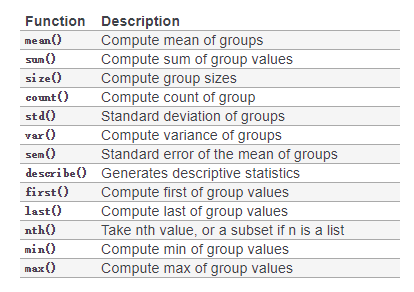

同样，groupby支持apply方法，通过自定义函数，设计自己个性化的操作

但是这有个问题，就是不好知道函数的输入和输出应该是什么，此时我们仍然使用在函数里加print的小技巧 

In [33]:
def myfun(x):
    print(type(x), "\n")
    print(x, "\n\n\n")
    return x.loc[:, ["return"]].T
df_long.groupby(["trade_date", "industry"]).apply(myfun)

<class 'pandas.core.frame.DataFrame'> 

  trade_date industry       code    return
5 2018-01-01       IT  600001.SH -1.861417
6 2018-01-01       IT  600002.SH  0.480251
7 2018-01-01       IT  600003.SH  0.973385
8 2018-01-01       IT  600004.SH  0.885600
9 2018-01-01       IT  600005.SH  1.262396 



<class 'pandas.core.frame.DataFrame'> 

  trade_date industry       code    return
5 2018-01-01       IT  600001.SH -1.861417
6 2018-01-01       IT  600002.SH  0.480251
7 2018-01-01       IT  600003.SH  0.973385
8 2018-01-01       IT  600004.SH  0.885600
9 2018-01-01       IT  600005.SH  1.262396 



<class 'pandas.core.frame.DataFrame'> 

  trade_date industry       code    return
0 2018-01-01  finance  000001.SZ  0.134070
1 2018-01-01  finance  000002.SZ -2.260022
2 2018-01-01  finance  000003.SZ -1.319141
3 2018-01-01  finance  000004.SZ  1.248812
4 2018-01-01  finance  600000.SH -1.458900 



<class 'pandas.core.frame.DataFrame'> 

   trade_date industry       code    return
15 2018-01

90        91        92        93        94
trade_date industry                                                         
2018-01-01 IT       return -1.861417  0.480251  0.973385  0.885600  1.262396
           finance  return  0.134070 -2.260022 -1.319141  1.248812 -1.458900
2018-01-02 IT       return -0.955342 -0.427520  0.853362 -0.263019  0.419797
           finance  return -1.395590  0.115214 -0.067648  0.874686  0.110549
2018-01-03 IT       return -0.597976  0.582021  0.014814  1.782789  1.405429
           finance  return -0.965794  0.433888 -0.013961  0.524512  0.810475
2018-01-04 IT       return  0.290267 -0.613722  1.213895 -3.485022 -0.524969
           finance  return  0.586925 -0.716262 -0.664894 -0.347587 -0.116373
2018-01-05 IT       return -0.074259 -0.069106 -0.890096 -1.059268 -0.906289
           finance  return -0.840258 -1.836083  0.112320 -0.874472 -0.386724
2018-01-06 IT       return  1.015796 -0.950479  0.986468  1.423943 -0.137942
           finance  return  0.427036 -0.998221  0.942358  0.318099  1.783640
2018-01-07 IT       return -1.861500  1.326622  0.874962 -0.032426 -0.030793
           finance  return -0.587199 -2.738413  0.037051 -0.070978 -0.581894
2018-01-08 IT       return  0.469180  0.510648  0.707377 -1.199630  0.843623
           finance  return  0.584359 -0.625196 -2.358273 -0.981087 -1.353570
2018-01-09 IT       return  0.818313  0.720919 -0.000612 -1.673443  0.193775
           finance  return  0.870988 -1.221191 -0.200176 -1.867704  1.460311
2018-01-10 IT       return -0.343152  0.277676  0.722497 -0.098451  0.118369
           finance  return  0.852882 -1.122241  0.745620 -0.097422 -0.254086